## __Actividad 1 - Natural Language Processing__

Integrantes del equipo:
- David Guzmán Leyva - A01706417
- Enrique Santos Fraire - A01705746
- Leonardo Alvarado Menéndez - A01705998
- Oscar Enrique Delgadillo Ochoa - A01705935

Actividades:
1. Implementar función de semejanza y distancia a partir de los vectores de embeddings que se vieron en clases.
2. Implementar función que permite realizar analagías dadas 3 palabras, como los ejemplos que se vieron en clases.
3. Implementar función para hacer plot de palabras en dos dimensiones utilizando PCA para reducir la dimensionalidad de los vectores.

In [8]:
import numpy as np
from numpy.linalg import norm

from gensim.models import KeyedVectors
from gensim.test.utils import datapath, get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec

import matplotlib.pyplot as plt
# plt.style.une('ggplot')

from sklearn.decomposition import PCA

In [9]:
glove_file = datapath("C:/Users/Oscar/Documents/Aprender/Universidad/Semestre_7/Bloque_1-3/IA avanzada para la ciencia de datos II/NLP/glove.6B.100d.txt");

word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt");
glove2word2vec(glove_file, word2vec_glove_file);

C:\Users\Oscar\AppData\Local\Temp\ipykernel_18176\2996178563.py:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [10]:
# Load model
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [31]:
# Test model
model.most_similar('raw')
model.most_similar('scary')
model.most_similar('python')
model.most_similar('cat')

[('dog', 0.8798074126243591),
 ('rabbit', 0.7424427270889282),
 ('cats', 0.732300341129303),
 ('monkey', 0.7288709878921509),
 ('pet', 0.7190139889717102),
 ('dogs', 0.7163873314857483),
 ('mouse', 0.6915250420570374),
 ('puppy', 0.6800068616867065),
 ('rat', 0.6641027331352234),
 ('spider', 0.6501135230064392)]

### __Create functions__

In [ ]:
# 1. Función de semejanza y distancia
def print_sim_distance(w1, w2):
    A, B = model[w1], model[w2]
    # use cosine similarity to get distance
    distance =  np.dot(A,B)/(norm(A)*norm(B))
    return f"{w1} is {distance} similar to {w2}"

In [191]:
# 2. Función que permite realizar analagías dadas 3 palabras
def print_analogy(w1, w2, y1):
    # use formula to get analogy between 2 words
    analogy = (model[w2] - model[w1]) + model[y1]
    res = model.most_similar(analogy)
    return f"{w1} is a {w2} as {y1} is to {res[1][0]}"


In [ ]:
# Función para hacer plot de palabras en dos dimensiones utilizando PCA
def display_wordmap(model, words):
    pca = PCA(n_components=2)  # seleccionamos 2 dimensiones
    data = pca.fit_transform(model)  # aplicamos pca
    plt.figure(figsize=(10, 7), dpi=100)
    plt.plot(data[:, 0], data[:, 1], '.')
    for i in range(len(data)):
        plt.annotate(words[i], xy=data[i])

### __Test our functions__

In [192]:
print_sim_distance('cat', 'dog')

'cat is 0.8798074126243591 similar to dog'

In [193]:
print_analogy('man', 'king', 'woman')

'man is a king as woman is to queen'

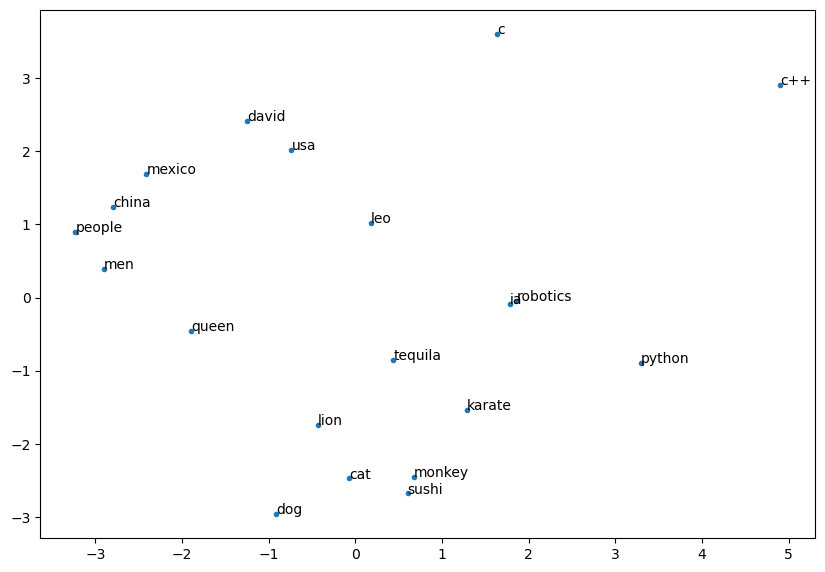

In [194]:
data = [model[w] for w in words]
words = ['dog', 'cat', 'monkey', 'people', 'leo', 'david', 'python', 'c++', 'sushi', 'mexico',
         'china', 'usa', 'karate', 'tequila', 'lion', 'c', 'ia', 'robotics', 'men', 'queen']
display_wordmap(data, words)